# AI Weather Prediction Project Notebook

#### Order
1. Decision Tree Regressor
2. XGBoost Classification: Precipitation Percentage
3. XGBoost Classification: Precipitation Category
4. TensorFlow Neuro Network

#### Load Libraries to be used by all models. 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


from sklearn.metrics import r2_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor

from joblib import dump, load

plt.rcParams['figure.figsize']=(6,4)

In [44]:
!pip install openpyxl

In [2]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    color=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

## Decision Tree Regressor

In [3]:
weather_data = pd.read_csv('weather_data_cleaned.csv')
print(weather_data.columns)
y = weather_data['Precipitation_mm']
X = weather_data.drop(columns=['Precipitation_mm', 'Rain_Category', 'Location', 'Date', 'Military_Time', 'Lat', 'Long'])

Index(['Location', 'Temperature_F', 'Humidity_pct', 'Precipitation_mm',
       'Wind_Speed_kmh', 'Date', 'Military_Time', 'Rain_Category',
       'Day_Of_Year', 'Rain_Cat_Num', 'Lat', 'Long'],
      dtype='object')


In [4]:
X.columns

Index(['Temperature_F', 'Humidity_pct', 'Wind_Speed_kmh', 'Day_Of_Year',
       'Rain_Cat_Num'],
      dtype='object')

In [5]:
y.describe()

count    1000000.000000
mean           5.109639
std            2.947995
min            0.000000
25%            2.580000
50%            5.110000
75%            7.610000
max           14.970000
Name: Precipitation_mm, dtype: float64

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [7]:
print('X_train.shape = ', X_train.shape)
print('y_train.shape = ', y_train.shape)
print('X_test.shape = ', X_test.shape)
print('y_test.shape = ', y_test.shape)

X_train.shape =  (838860, 5)
y_train.shape =  (838860,)
X_test.shape =  (209715, 5)
y_test.shape =  (209715,)


In [8]:
dt = DecisionTreeRegressor(max_depth=10)
dt.fit(X_train, y_train)

ValueError: Input y contains NaN.

In [ ]:
y_train_pred = dt.predict(X_train)
print(r2_score(y_train, y_train_pred))
y_test_pred = dt.predict(X_test)
print(r2_score(y_test, y_test_pred))

In [ ]:
y_train_pred

In [ ]:
y_test_pred

In [ ]:
training_r2 = []
testing_r2 = []

In [ ]:
for depth in range(1, 5):
    dtr = DecisionTreeRegressor( max_depth = depth )
    dtr.fit(X_train, y_train)
    
    y_train_pred = dtr.predict(X_train)
    
    # Training R2 Score
    training_r2.append(r2_score(y_train, y_train_pred))

    y_test_pred = dtr.predict(X_test)

    # Testing R2 Score
    testing_r2.append(r2_score(y_test, y_test_pred))    
    

In [ ]:
plt.plot(training_r2, label="Training")
plt.plot(testing_r2, label = "Testing")
plt.xlabel('Max Depth')
plt.ylabel('R2 Score')
plt.legend(loc = 'upper left')
plt.show()

## XGBoost Regressor 

In [ ]:
df = pd.read_csv('weather_data_cleaned.csv')

In [ ]:
# Establish X and y
y = df['Precipitation_mm']
X = df.drop(columns=['Precipitation_mm','Military_Time','Rain_Category', 'Location', 'Date', 'Lat', 'Long'])

In [ ]:
# Check if the correct columns for X have been added
X.columns

In [ ]:
# Prepare Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 4700)

In [ ]:
# Create XGBoost Regression Model
import xgboost
xgb_r = xgboost.XGBRegressor(objective='reg:squarederror', enable_categorical=True, n_estimators = 10 )

In [ ]:
# Fit the model
xgb_r.fit(X_train, y_train)

In [ ]:
# Determine Training R2 Score
prediction = xgb_r.predict(X_train)
training_r2 = r2_score(y_train, prediction )
training_r2

In [ ]:
# Determine Testing R2 Score
prediction = xgb_r.predict(X_test)
testing_r2 = r2_score(y_test, prediction )
testing_r2

### Test XGBoost Regressor at depths 1 through 10

In [ ]:
training_r2 = []
testing_r2 = []

In [ ]:
for depth in range(1, 11):
    xgb_r = xgboost.XGBRegressor(objective='reg:squarederror', enable_categorical=True, n_estimators = depth )
    xgb_r.fit(X_train, y_train)
    
    y_train_pred = xgb_r.predict(X_train)
    training_r2.append(r2_score(y_train, y_train_pred))
    
    y_test_pred = xgb_r.predict(X_test)
    testing_r2.append(r2_score(y_test, y_test_pred))
    

In [ ]:
plt.plot(training_r2, label="Training")
plt.plot(testing_r2, label = "Testing")
plt.xlabel('Max Depth')
plt.ylabel('R2 Score')
plt.legend(loc = 'upper left')
plt.show()

## XGBoost Classifier: Percentage Rainfall


In [ ]:
data_frame = pd.read_csv('weather_data_cleaned.csv')

In [ ]:
data_frame['Date'] = pd.to_datetime(data_frame['Date'])

In [ ]:
data_frame['Month'] = data_frame['Date'].dt.month
data_frame['Day'] = data_frame['Date'].dt.day
data_frame['Year'] = data_frame['Date'].dt.year

In [ ]:
location_encoder = LabelEncoder()

In [ ]:
data_frame['Location_encoded'] = location_encoder.fit_transform(data_frame['Location'])

In [ ]:
# This is the threshold, in mm, for if rainfall is classified as rain or not
threshold = 0.005
data_frame['Rainfall'] = (data_frame['Precipitation_mm'] >= threshold).astype(int)

In [ ]:
y=data_frame['Rainfall']

In [ ]:
X = data_frame.drop(columns=['Precipitation_in', 'Precipitation_mm', 'Date', 'Military_Time', 'Day_Of_Year', 'Rain_Category', 'Rain_Cat_Num', 'Lat', 'Long', 'Location', 'Rainfall'])

In [ ]:
X.columns

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 4700)

In [ ]:
xgb_c = xgboost.XGBClassifier(objective='reg:squarederror', n_estimators = 100, max_depth = 10 )

In [ ]:
xgb_c.fit(X_train, y_train)

In [ ]:
y_train_pred = xgb_c.predict(X_train)
training_accuracy = accuracy_score(y_train, y_train_pred)
training_accuracy

In [ ]:
y_test_pred = xgb_c.predict(X_test)
testing_accuracy = accuracy_score(y_test, y_test_pred)
testing_accuracy


In [ ]:
# Saving the model and encoder
dump(xgb_c, 'rain_probability_predictor.pkl')
dump(location_encoder, 'location_encoder.pkl')

### Visualise Data

In [ ]:
y_pred = xgb_c.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay( confusion_matrix=cm, display_labels=['No Rain', 'Rain'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

## XGBoost Classifier

In [ ]:
# Write XGB Classifier Code Here
# edf = pd.read_excel('weather_data_excelx.xlsx')
edf = pd.read_excel('weather_data_excelx.xlsx')
edf = edf.iloc[:1000000]
edf

In [ ]:
edf['Hour'] = edf['Military_Time'].apply(lambda x: int(x.split(":")[0]))
edf['Minute'] = edf['Military_Time'].apply(lambda x: int(x.split(":")[1]))
edf

In [ ]:
#Removing empety rows
X = edf.drop(columns=["Date", "Location", "Rain_Cat_Num", "Rain_Category", 'Military_Time', 'Precipitation_mm'])
X

In [ ]:
y = edf["Rain_Cat_Num"]
y

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify=y)

In [ ]:
y_train

In [ ]:
y_test

In [9]:
from xgboost import XGBClassifier

In [36]:
xgb_clf = XGBClassifier(n_estimators=25, max_depth=5)
xgb_clf.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=25, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [13]:
from sklearn.metrics import accuracy_score

In [37]:
y_train_pred = xgb_clf.predict(X_train)

In [38]:
accuracy_score(y_train, y_train_pred)

0.5067657142857143

In [39]:
y_test_pred = xgb_clf.predict(X_test)

In [40]:
accuracy_score(y_test, y_test_pred)

0.5067366666666666

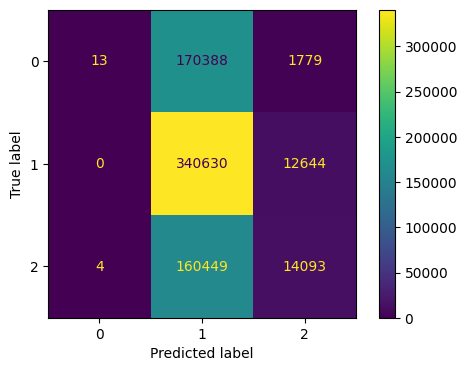

In [41]:
cm = confusion_matrix(y_train, y_train_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()

In [ ]:
# r2Train = []
# r2Test = []
# for i in range(1, 31):
#     xgb = XGBClassifier(n_estimators=25, max_depth=1)
#     xgb.fit(X_train, y_train)
#     y_train_pred = dt.predict(X_train)
#     r2Train.append(r2_score(y_train, y_train_pred))
#     y_test_pred = dt.predict(X_test)
#     r2Test.append(r2_score(y_test, y_test_pred))

## Tensor Flow Neuro Network

In [ ]:
# Write Tensor Flow Neuro Network Code Here

In [ ]:
print("hello")